Imports

In [1]:
%load_ext autoreload
%autoreload 1

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

from helper import get_data, plot_data, extract_seqX_outY
from LSTM import LSTM

Get the data

In [2]:
symbol = 'MSFT'  # Feel free to change this to whichever stock you want to analyze

data = get_data(symbol=symbol)  # Get the data for the given stock as a DataFrame
data = data.sort_index()
data.head()

,open,high,low,close,volume
timestamp,,,,,
1999-11-01,93.25,94.19,92.12,92.37,26630600
1999-11-02,92.75,94.50,91.94,92.56,23174500
1999-11-03,92.94,93.50,91.50,92.00,22258500
1999-11-04,92.31,92.75,90.31,91.75,27119700
1999-11-05,91.81,92.87,90.50,91.56,35083700


View the data

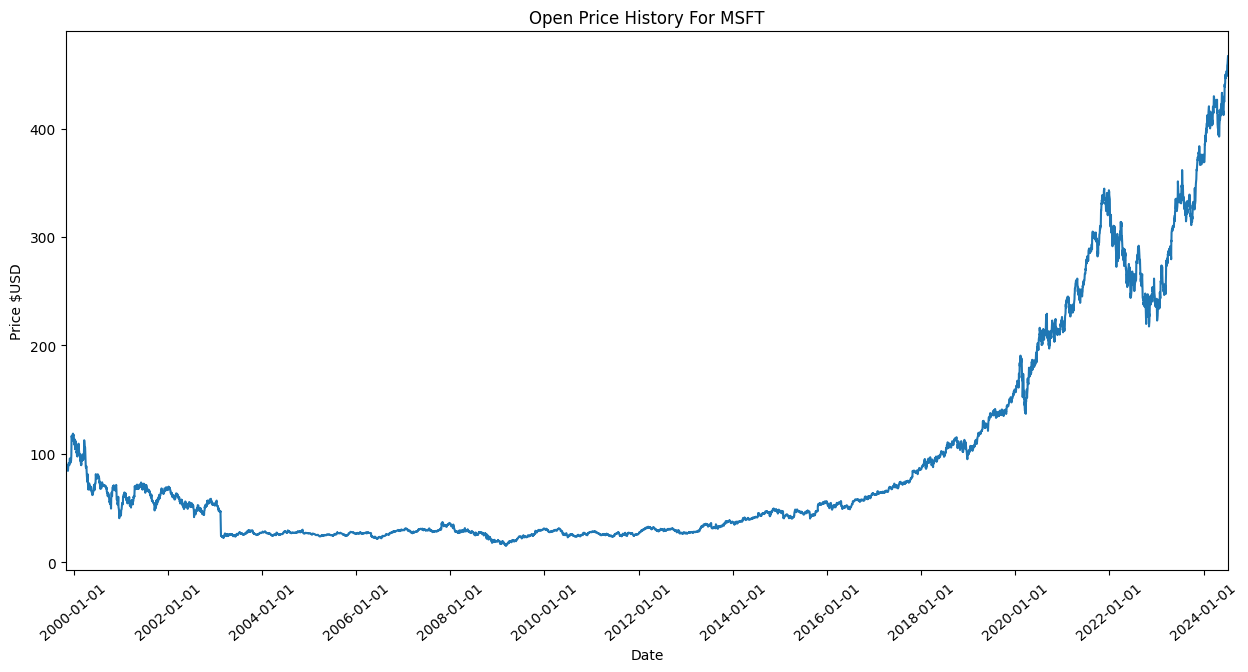

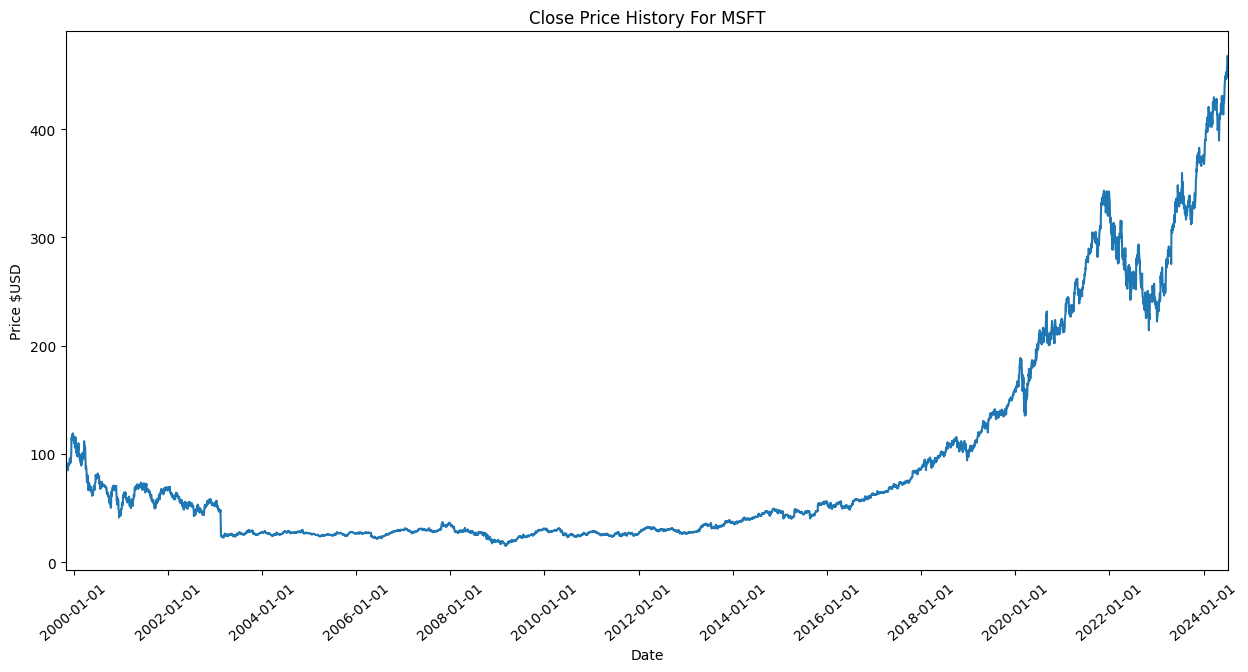

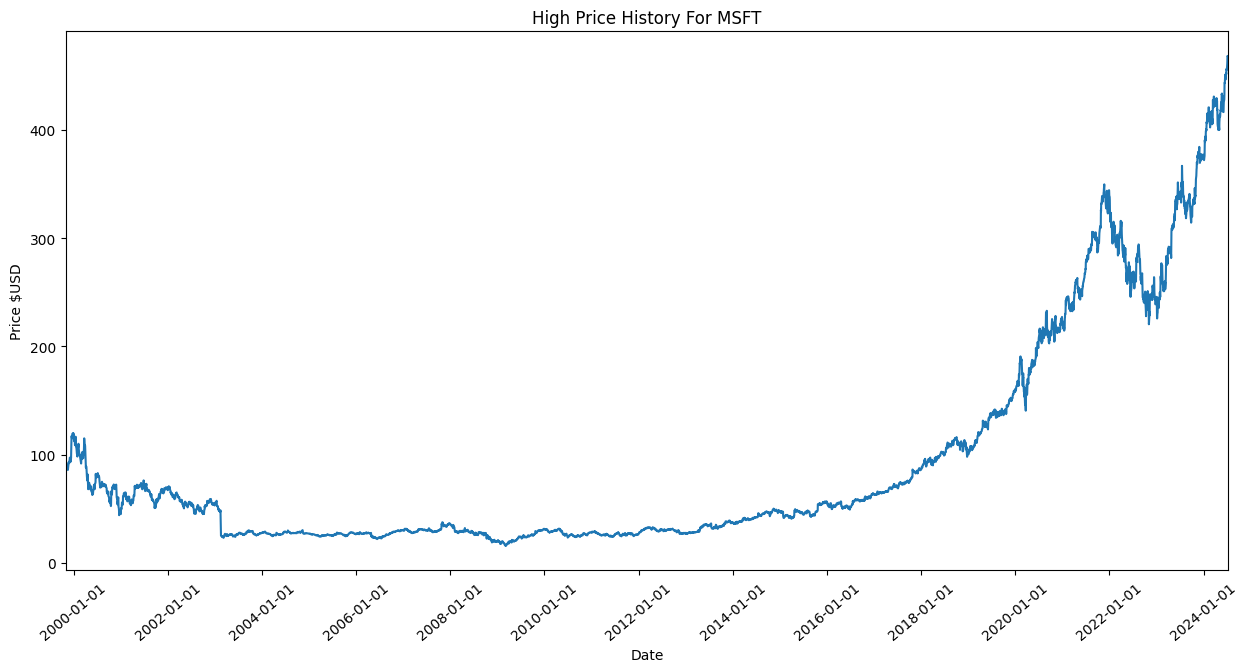

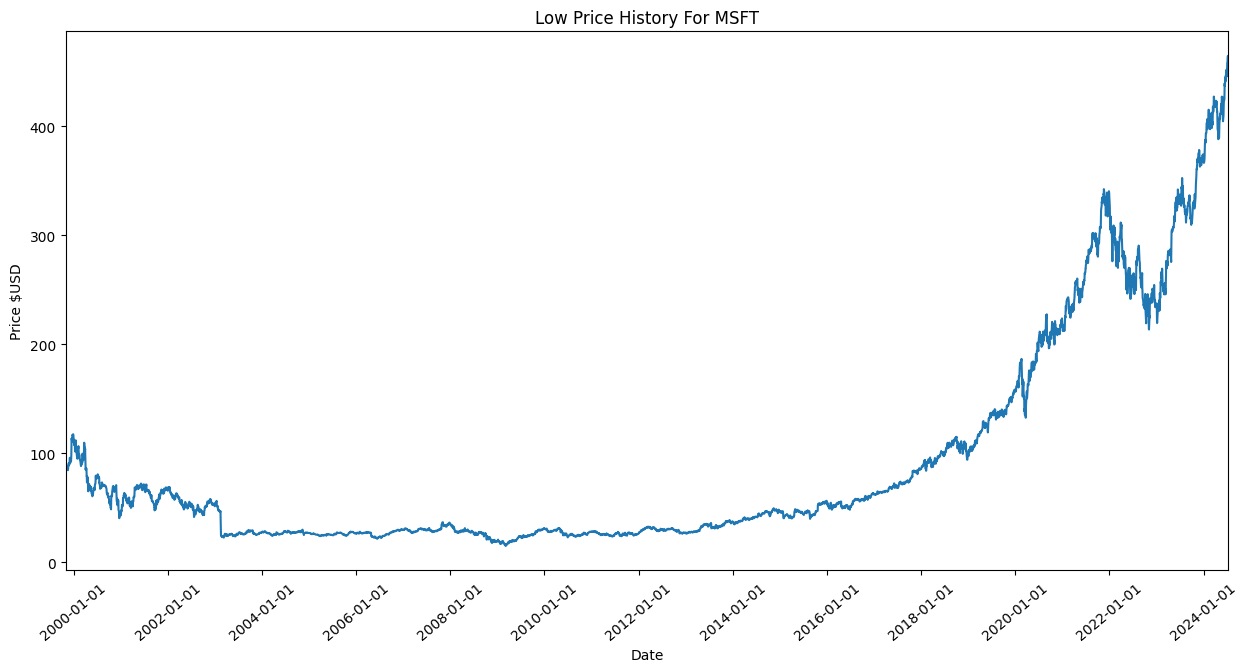

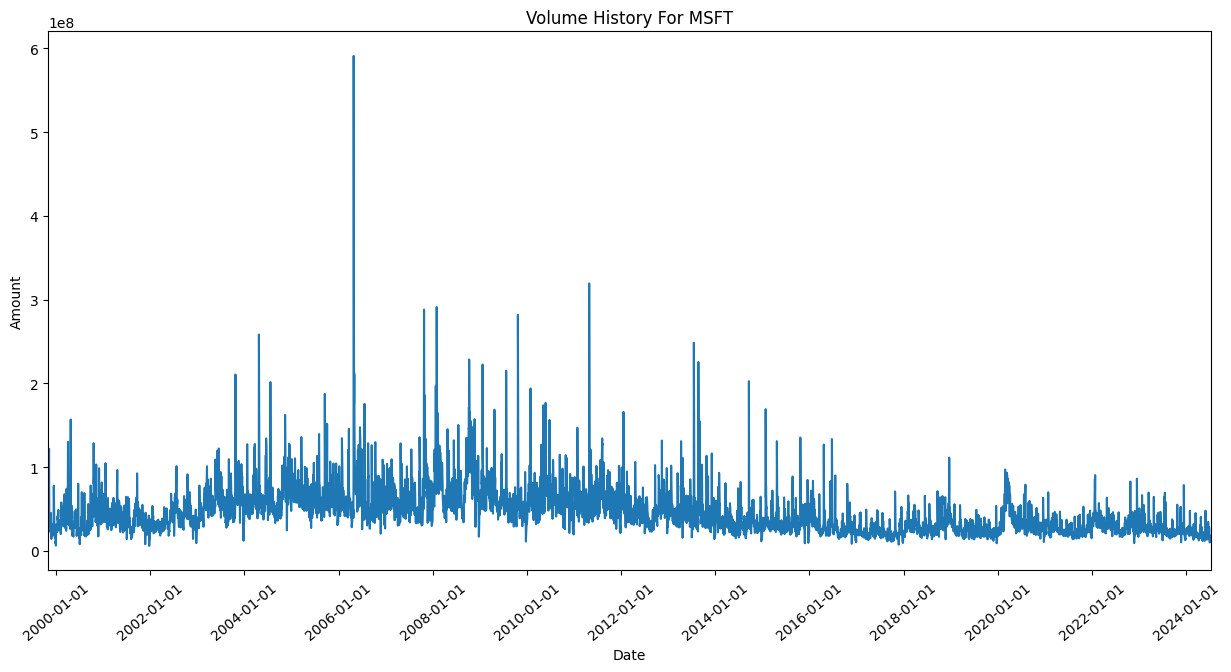

In [3]:
plot_data(data, symbol, 'open', 'year', 'Open Price')
plot_data(data, symbol, 'close', 'year', 'Close Price')
plot_data(data, symbol, 'high', 'year', 'High Price')
plot_data(data, symbol, 'low', 'year', 'Low Price')
plot_data(data, symbol, 'volume', 'year', 'Volume')

View Last 30 Trading Days

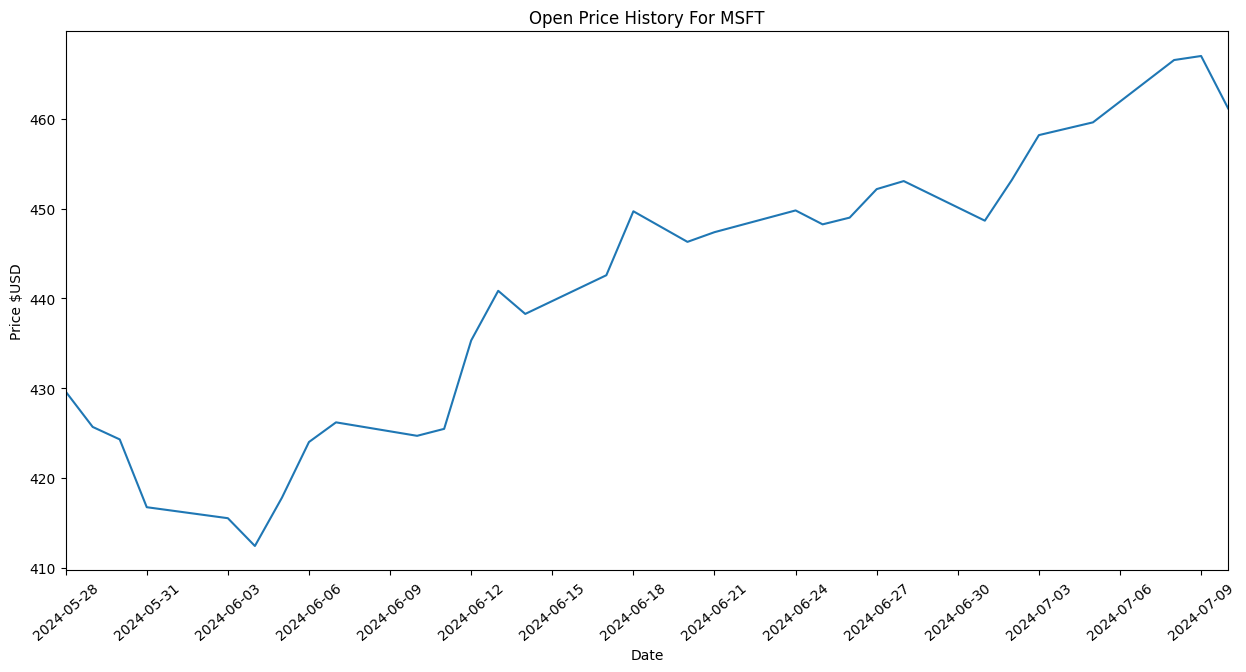

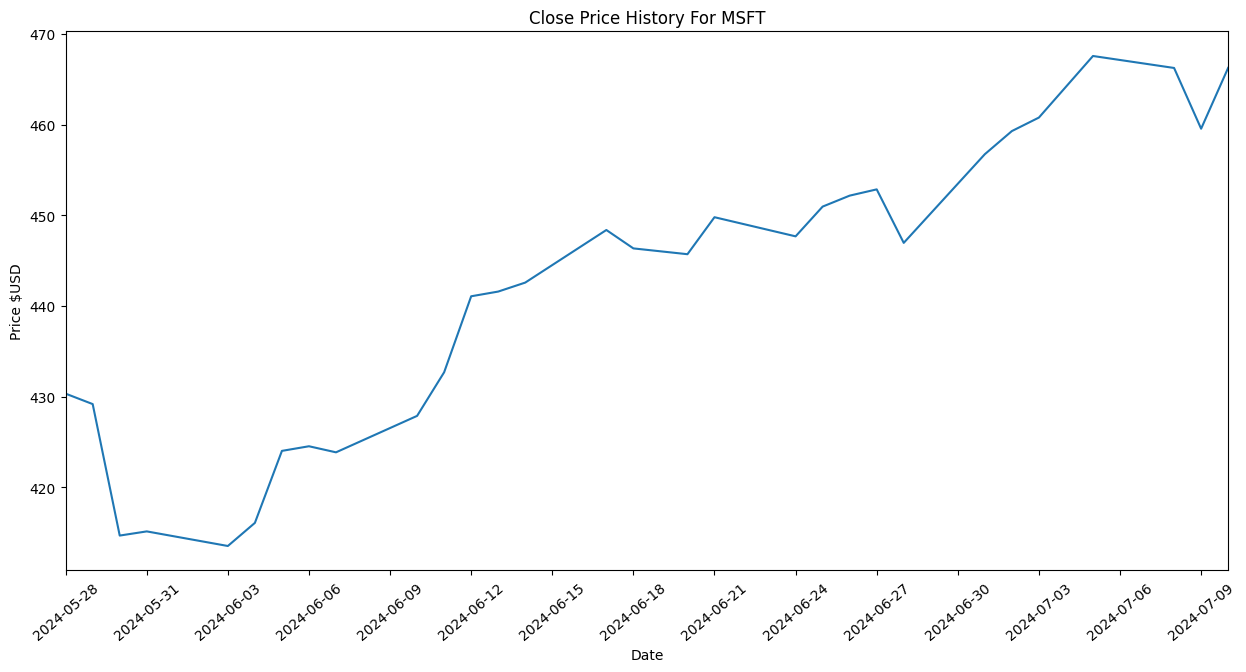

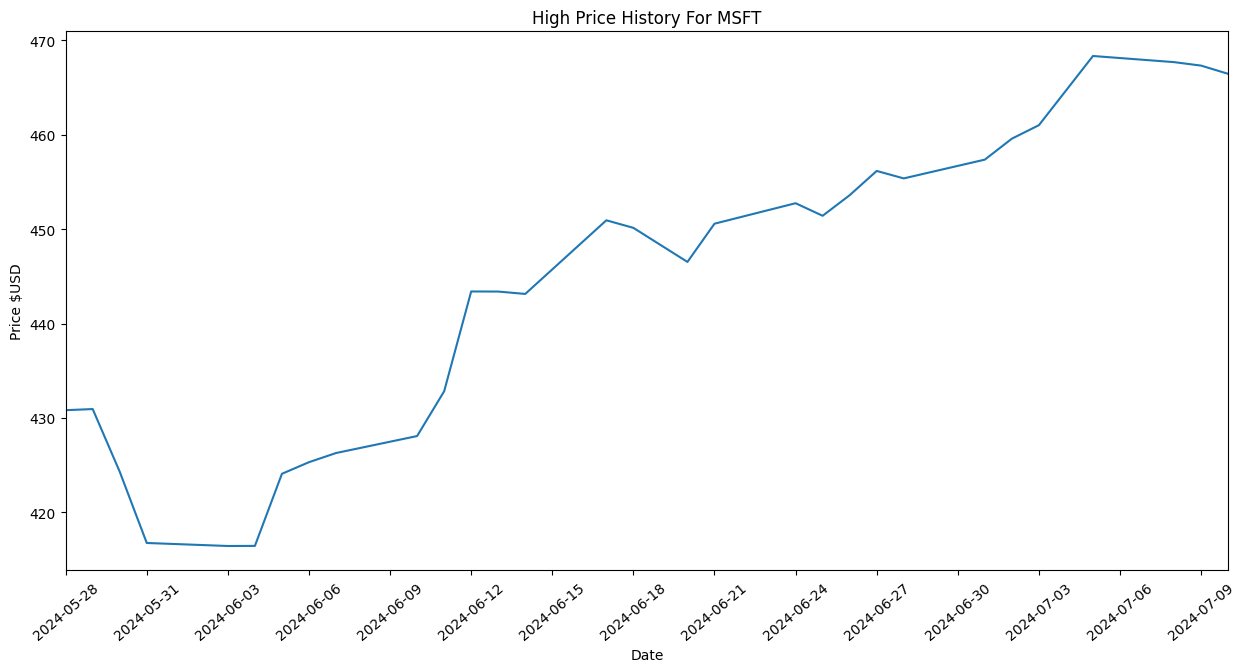

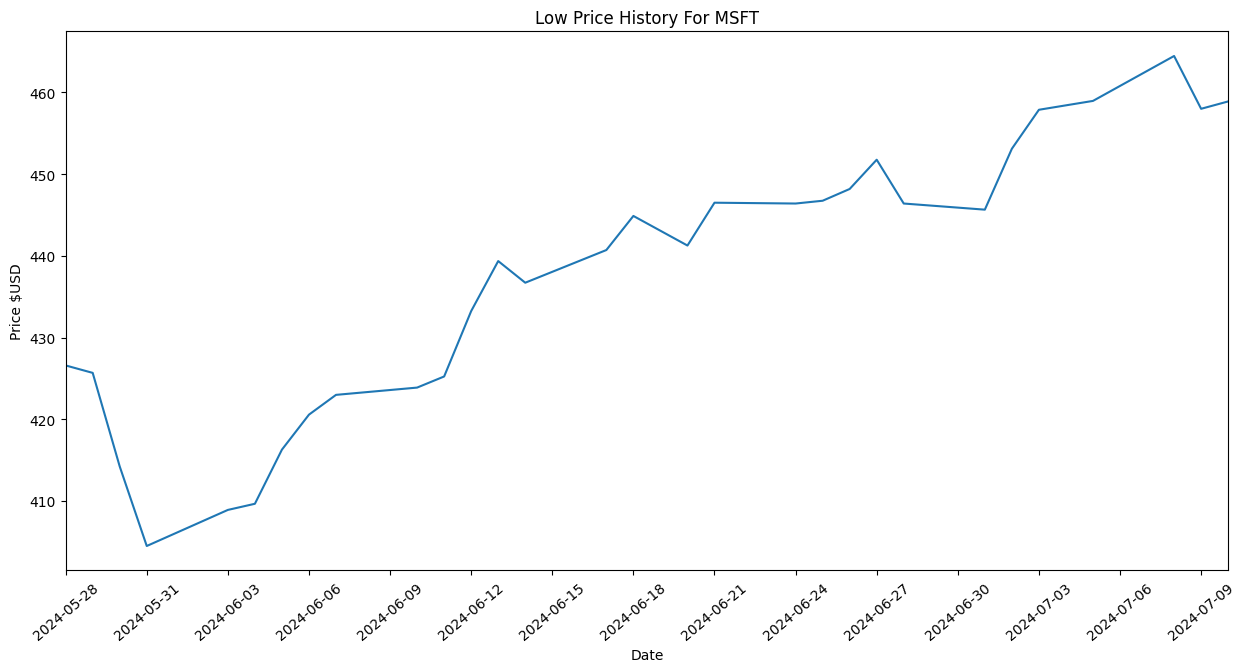

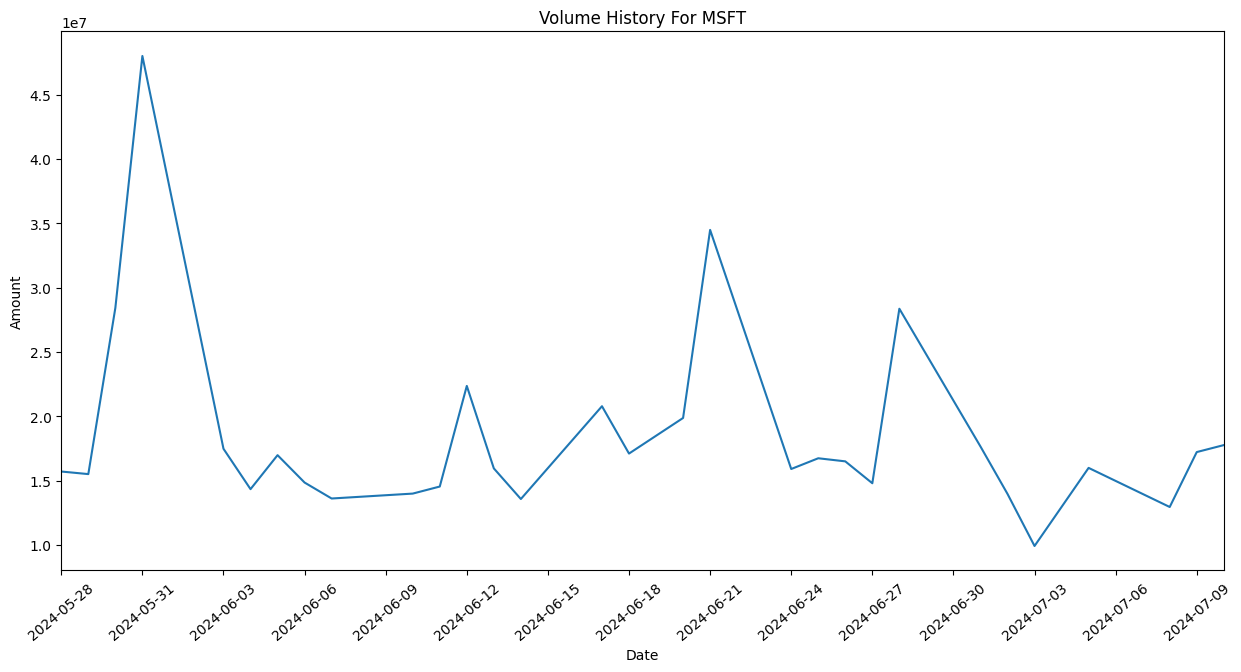

In [4]:
temp_data = data.iloc[-30:]  # Get data from only the last 30 trading days

plot_data(temp_data, symbol, 'open', 'day', 'Open Price')
plot_data(temp_data, symbol, 'close', 'day', 'Close Price')
plot_data(temp_data, symbol, 'high', 'day', 'High Price')
plot_data(temp_data, symbol, 'low', 'day', 'Low Price')
plot_data(temp_data, symbol, 'volume', 'day', 'Volume')

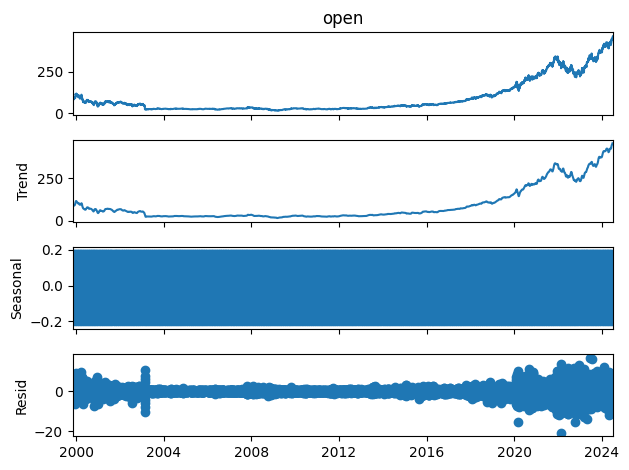

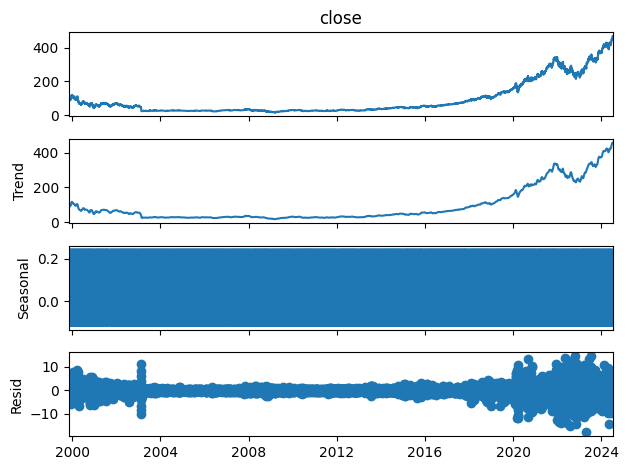

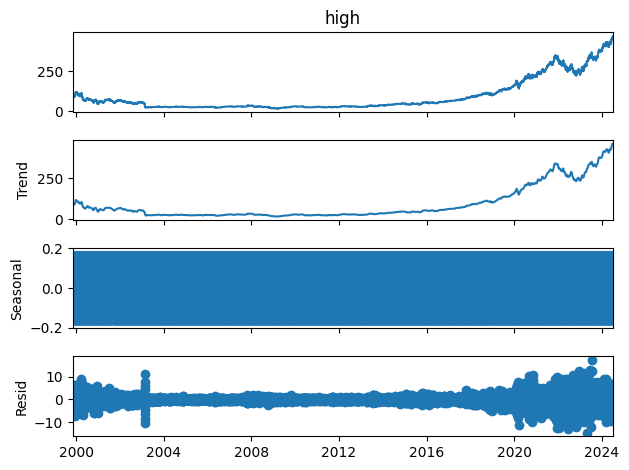

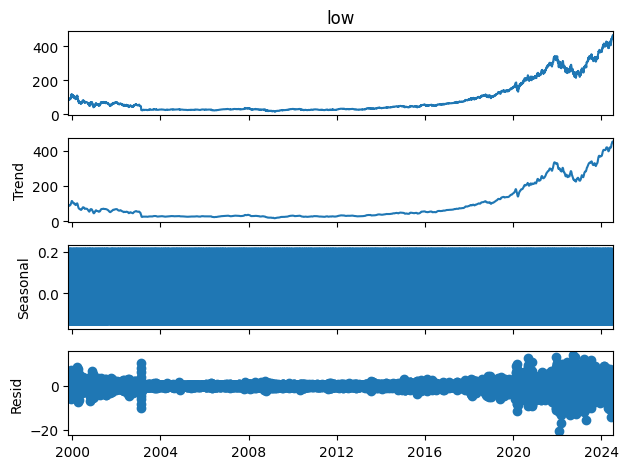

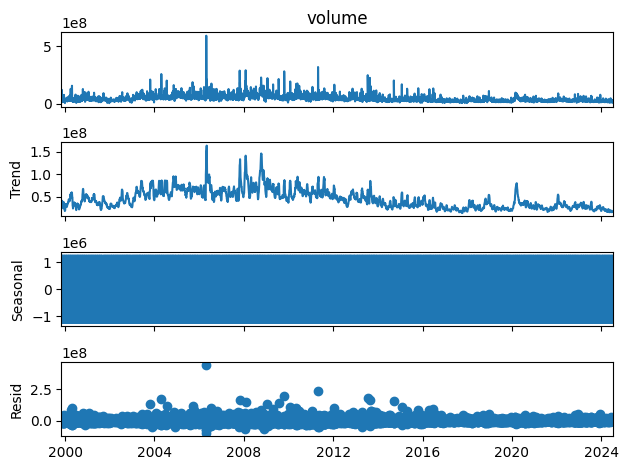

In [5]:
result = seasonal_decompose(data['open'], period=12)
result.plot()
plt.show()
result = seasonal_decompose(data['close'], period=12)
result.plot()
plt.show()
result = seasonal_decompose(data['high'], period=12)
result.plot()
plt.show()
result = seasonal_decompose(data['low'], period=12)
result.plot()
plt.show()
result = seasonal_decompose(data['volume'], period=12)
result.plot()
plt.show()

Prepare Data

In [6]:
# 85% of data for training, 15% of data for testing
train_data, test_data = train_test_split(data, test_size=0.15, shuffle=False)

In [7]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [8]:
X_train, y_train = extract_seqX_outY(train_data, 5, 0)
X_test, y_test = extract_seqX_outY(test_data, 5, 0)

Prepare the Model

In [9]:
model = LSTM(input_size=5, hidden_size=32, num_layers=3, dropout=0.2)

AttributeError: cannot assign module before Module.__init__() call

Train the Model

Obtain and Plot Predictions